# Week 07 Exercises 

### 7.1 Calculating the Normalized Difference Index
From [https://www.usgs.gov/landsat-missions/landsat-normalized-difference-vegetation-index](https://www.usgs.gov/landsat-missions/landsat-normalized-difference-vegetation-index)... the Normalized Difference Vegetation Index (NDVI) is used to quantify vegetation greenness and is useful in understanding vegetation density and assessing changes in plant health. NDVI is calculated as a ratio between the red (R) and near infrared (NIR) values in traditional fashion: 

(NIR - R) / (NIR + R)

NDVI always ranges from -1 to +1. But there isn’t a distinct boundary for each type of land cover.For example, when you have negative values, it’s highly likely that it’s water. On the other hand, if you have an NDVI value close to +1, there’s a high possibility that it’s dense green leaves. But when NDVI is close to zero, there are likely no green leaves and it could even be an urbanized area.

For this first exercise you will calculate NDVI over the LMU campus.

1. Load both red (``` 'data/2023-02-22-sentinel-2-red-band.tiff' ```) and NIR (``` 'data/2023-02-22-sentinel-2-NIR-band.tiff' ```) bands from images taken from Sentinel-2 satellite over the LMU campus on February 22, 2023. Make sure when loading to use ```masked=True ```. Why do we want to do this? Check to see if the bounds, resolution and CRS are the same for both datasets. 

2. Calculate the NDVI. Export and save to a file as ``` 'data/2023-02-22-sentinel-2-NDVI.tiff' ```

3. Plot the NDVI data using the colormap ```RdYlGn```. Write 1-2 sentences describing patterns you notice.

4. Create a histogram with the custom bins: ```  bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1] ```. Write 1-2 sentences explaining patterns you notice. Lastly, print the max and min values. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import seaborn as sns
# Use geopandas for vector data and xarray for raster data
import geopandas as gpd
import rioxarray as rxr
import xarray as xr
from shapely.geometry import mapping
sns.set(font_scale=1.5, style="white")

In [2]:
red_band = rxr.open_rasterio('data/2023-02-22-sentinel-2-red-band.tiff', masked=True).squeeze()
nir_band = rxr.open_rasterio('data/2023-02-22-sentinel-2-NIR-band.tiff', masked=True).squeeze()

In [3]:
red_band

<xarray.DataArray (y: 140, x: 159)>
[22260 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 -118.4 -118.4 -118.4 ... -118.4 -118.4 -118.4
  * y            (y) float64 33.98 33.97 33.97 33.97 ... 33.96 33.96 33.96 33.96
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    scale_factor:            1.0
    add_offset:              0.0

In [4]:
nir_band

<xarray.DataArray (y: 140, x: 159)>
[22260 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 -118.4 -118.4 -118.4 ... -118.4 -118.4 -118.4
  * y            (y) float64 33.98 33.97 33.97 33.97 ... 33.96 33.96 33.96 33.96
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    scale_factor:            1.0
    add_offset:              0.0

In [5]:
print("The CRS for this data is:", red_band.rio.crs)

The CRS for this data is: EPSG:4326


In [6]:
print("The CRS for this data is:", nir_band.rio.crs)

The CRS for this data is: EPSG:4326


In [7]:
#Same CRS for both data sets

In [8]:
print("The spatial extent is:", red_band.rio.bounds())
print("The spatial extent is:", nir_band.rio.bounds())

The spatial extent is: (-118.42786815308502, 33.9646462468473, -118.41357734345368, 33.975110013826104)
The spatial extent is: (-118.42786815308502, 33.9646462468473, -118.41357734345368, 33.975110013826104)


In [9]:
#Same spatial extent

In [10]:
red_band.rio.resolution()

(8.987930585753243e-05, -7.474119270572796e-05)

In [11]:
nir_band.rio.resolution()

(8.987930585753243e-05, -7.474119270572796e-05)

In [12]:
print("The no data value is:", red_band.rio.nodata)

The no data value is: None


In [13]:
print("The no data value is:", nir_band.rio.nodata)

The no data value is: None


In [14]:
ndvi = (nir_band.astype(float) - red_band.astype(float)) / (nir_band + red_band)

In [15]:
ndvi.rio.to_raster('data/2023-02-22-sentinel-2-NDVI.tiff')

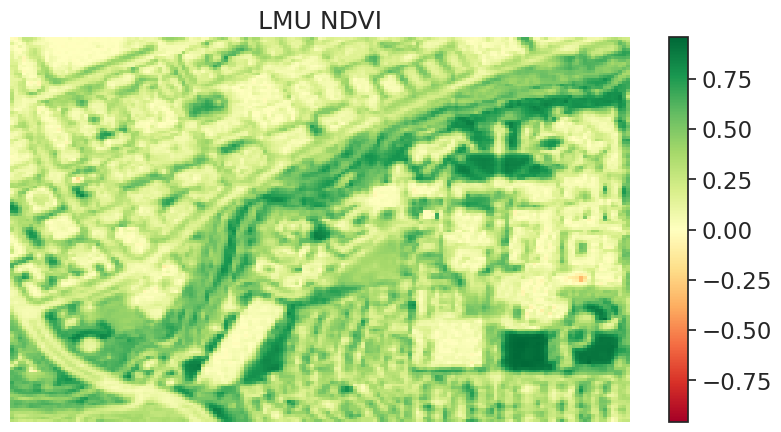

In [16]:
f, ax = plt.subplots(figsize=(10, 5))
ndvi.plot(cmap="RdYlGn")
ax.set(title="LMU NDVI")
ax.set_axis_off()
plt.show()

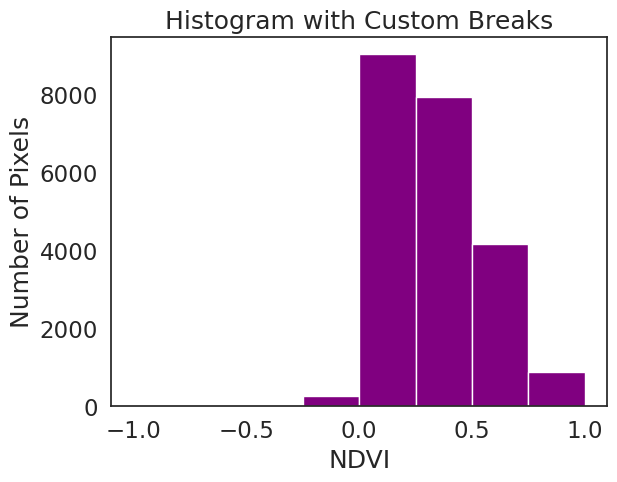

In [17]:
f, ax = plt.subplots()
ndvi.plot.hist(color="purple",
                        bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
ax.set(title="Histogram with Custom Breaks",
       xlabel="NDVI",
       ylabel="Number of Pixels")

plt.show()
#fix x and y values

### 7.2  Manually Reclassify NDVI Data
Buildling on 7.1, let's now reclassify the NDVI data to more meaningful symbologies. 

1. Use the following breaks to reclassify the NDVI data:
- <0: water 
- 0 to 0.2: urban/barren
- 0.2 to 0.5: low vegetation
- $\gt$ 0.5: high vegetation

Note that you **do not** have to do any additional masking as your NoData mask already occured when loading in the data. 

2. Plot the data using the following parameters:
- ```colors = ['blue', 'beige', 'green', 'darkgreen']```
- ```class_bins = [0.5, 1.5, 2.5, 3.5, 4.5]```

Write a few sentences of what you observe. Where does this classification scheme do well? Where does it not do well? Think of what you see walking around campus and how it compares to the map you generated. 

3. Create a histogram of the classified NDVI data. Give rough approximations of the percentages of each cateogry (i.e. ~20% water, ~40% barren/urban land etc.)

In [27]:
class_bins = [-np.inf, 0, 0.2, 0.5, np.inf]
colors = ['blue', 'beige', 'green', 'darkgreen']
ndvi_noreclass = rxr.open_rasterio('data/2023-02-22-sentinel-2-NDVI.tiff').squeeze()
ndvi_class = xr.apply_ufunc(np.digitize,
                            ndvi_noreclass,
                            class_bins)

In [28]:
data_min_value = np.nanmin(ndvi_noreclass)
data_max_value = np.nanmax(ndvi_noreclass)
print(data_min_value, data_max_value)

-0.3420190995907231 0.9575891652727567


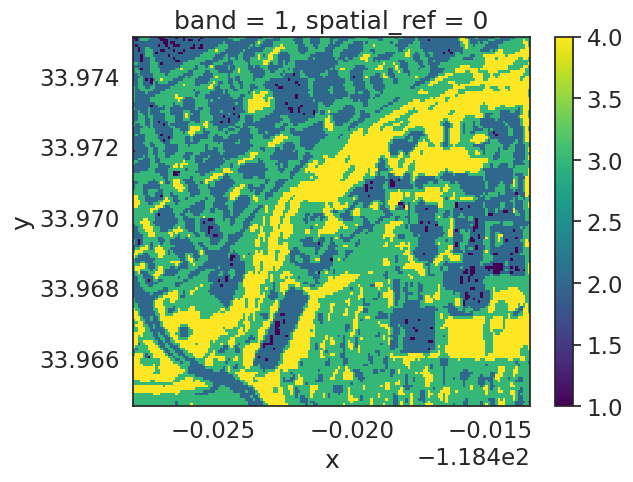

In [29]:
im = ndvi_class.plot.imshow()
ax.set_axis_off()

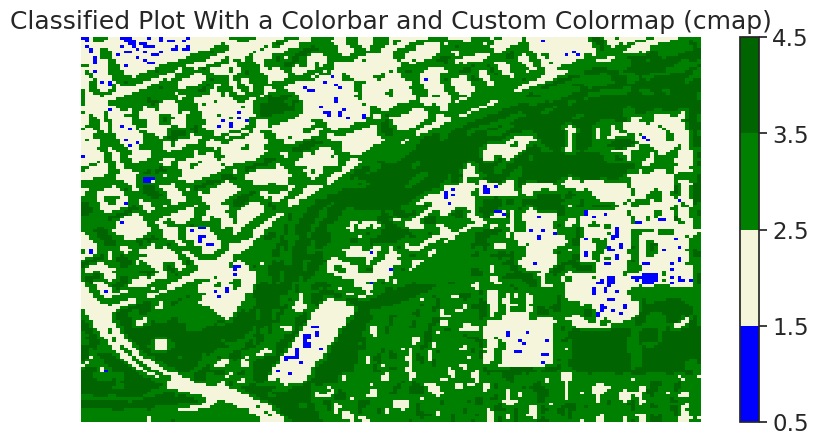

In [30]:
class_bins1 = [0.5, 1.5, 2.5, 3.5, 4.5]
cmap = ListedColormap(colors)
norm = BoundaryNorm(class_bins1, 
                    len(colors))

# Plot newly classified and masked raster
f, ax = plt.subplots(figsize=(10, 5))
ndvi_class.plot.imshow(cmap=cmap,
                                   norm=norm)
ax.set(title="Classified Plot With a Colorbar and Custom Colormap (cmap)")
ax.set_axis_off()
plt.show()

In [31]:
#This classification does a goodjob of demonstrating the grassy vegetation around campus as well as 
#the buildings on campus. However, the bin corresponding to the color blue is a bit ambiguous and doesn't clearly 
#show what that spaces are.

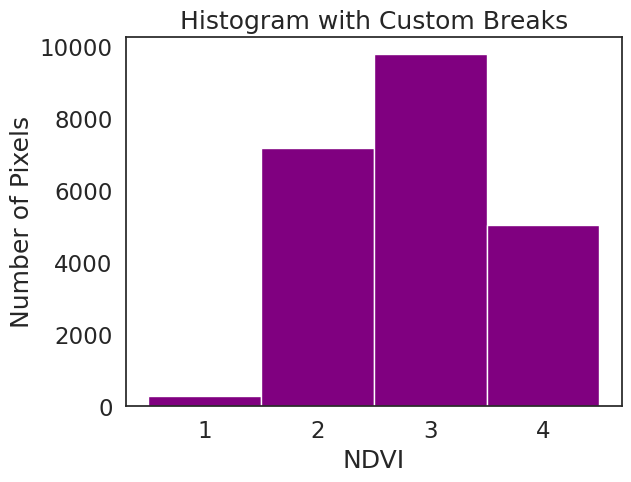

In [37]:
f, ax = plt.subplots()

ndvi_class.plot.hist(
    color='purple',
    bins = [0.5, 1.5, 2.5, 3.5, 4.5])
ax.set(title="Histogram with Custom Breaks",
       xlabel="NDVI",
       ylabel="Number of Pixels")

plt.show()

In [ ]:
# The majority of data falls under catagories 2 and 3 which correspond to urban/ barren and low vegetation. While a smaller precentage falls under
# water and high vegetation. Which makes sense due to the grassy areas around campus. 